Lab Assignment No 2.1 (DecisionTreeClassifier)

Imported Pandas as SmokingDataSet

In [23]:
import pandas as pd
df = pd.read_csv('SmokingDataSet.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


DataSet Information

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


select all the columns of type object and put it in list

In [25]:
objectList = list(df.select_dtypes(include='object'))
objectList

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

Performing label Encoding on Them

In [26]:
from sklearn import preprocessing
for i in objectList:
    Encoder = preprocessing.LabelEncoder()
    df[i]= Encoder.fit_transform(df[i])

Checking For Null Values
Luckily no null values

In [27]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [28]:
x = df.drop(columns=['stroke'],axis=1)
y = df['stroke']

Performed OverSampling

In [29]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(sampling_strategy='minority')
x,y = over_sampler.fit_resample(x,y)

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=62)

In [31]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train,y_train)
y_pred = DT_model.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(y_test,y_pred)
cm_log

array([[889,  58],
       [  0, 947]])

model(DecisionTree) AUC score: 0.969376979936642


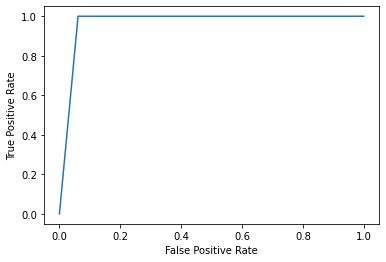

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def plot_roc_curve(y_test,y_pred):
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(y_test,y_pred)
print(f'model(DecisionTree) AUC score: {roc_auc_score(y_test, y_pred)}')